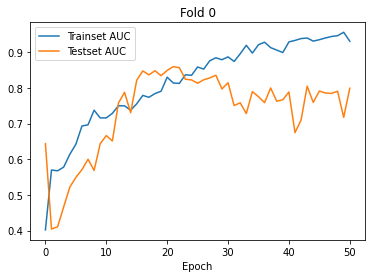

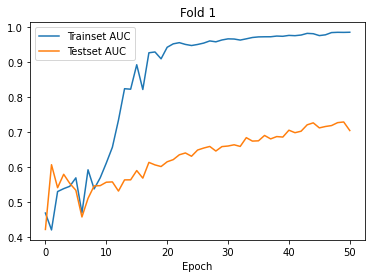

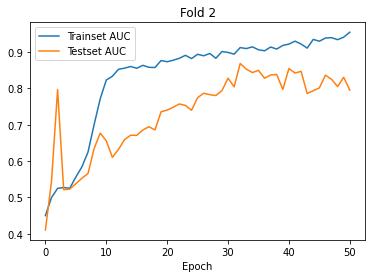

<Figure size 432x288 with 0 Axes>

In [4]:
import matplotlib.pyplot as plt
def plotTrainingStats(mins, maxes, trainsetAUC, testsetAUC):
    plt.plot(trainsetAUC, label="Trainset AUC")
    plt.plot(testsetAUC, label="Testset AUC")
    # plt.plot(mins, label="Mininum score in round")
    # plt.plot(maxes, label="Maximum score in round")
    plt.xlabel('Epoch')
    plt.legend()
    plt.show()
    plt.clf()

import pickle
for fold in range(3):
    hIndex = 2#time horizon index
    min_maxes = pickle.load(open('../kyle/min_max_%i.pkl' % fold, 'rb'))
    rocs = pickle.load(open('../kyle/roc_curves_%i.pkl' % fold, 'rb'))
    aucs = pickle.load(open('../kyle/auc_dat_%i.pkl'%fold, 'rb'))
    min_maxes = min_maxes[2:, :]
    mins, maxes = min_maxes[1::2, hIndex], min_maxes[::2, hIndex]
    mins, maxes = mins[1::2], maxes[1::2]
    testAUCs = aucs['test'][hIndex::5]
    trainAUCs = aucs['train'][hIndex::5]
    plt.title("Fold %i" % fold)
    plotTrainingStats(mins, maxes, trainAUCs, testAUCs)